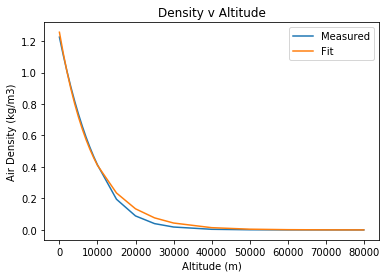

1.26e-0.0001
Error:  0.01556318394306735


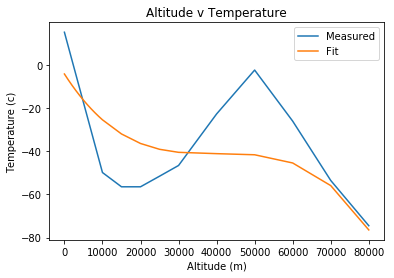

-5.63e-13*(x + -40289.88)**3 + -41.17
Error:  13.829627978979431


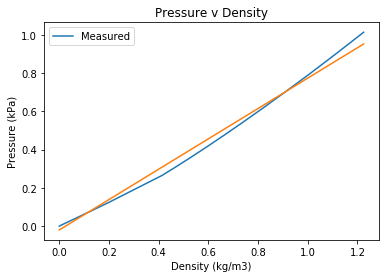

0.79*x + -0.02
Error :  0.49337257551174707


In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

atmosphere = pd.read_csv("atmosphere-data.csv", delimiter="\s+", encoding="utf-8-sig")

altitude = atmosphere["altitude"]
density = atmosphere["density"]
temperature = atmosphere["temperature"]
pressure = atmosphere["pressure"]


# density v altitude

ax1 = plt.subplot
plt.plot(altitude, density)

plt.xlabel("Altitude (m)")
plt.ylabel("Air Density (kg/m3)")
plt.title("Density v Altitude")

# define the function to fit the data
def exponent(x,a,b):
    return a*np.exp(-b*x)

# curve_fit returns a vector of optimum fit parameters, and a matrix of covariances
# a good p0 (parameter estimate) is required for curve_fit to work
popt_exp, pcov_exp = curve_fit(exponent, altitude, density, p0=[1.25,0.01])

plt.plot(altitude, exponent(altitude, *popt_exp))

plt.legend(["Measured", "Fit"])

# compute percent error between measured and fit curves
error = 0
for i in range(len(density)):
    error += abs(density[i] - exponent(altitude[i], *popt_exp))

plt.show()
print("%se-%s" % (np.round(popt_exp[0],2), np.round(popt_exp[1],4)))
print("Error: ", error/len(density))


# temperature v altitude

ax2 = plt.subplot
plt.plot(altitude, temperature)
plt.xlabel("Altitude (m)")
plt.ylabel("Temperature (c)")
plt.title("Altitude v Temperature")

def cubic(x,a,b,c):
    return a*(x+b)**3+c

popt_cube, pcov_cube = curve_fit(cubic, altitude, temperature, p0=[0.0000001,-35000,-25])

plt.plot(altitude, cubic(altitude, *popt_cube))

plt.legend(["Measured", "Fit"])

error = 0
for i in range(len(temperature)):
    error += abs(temperature[i] - cubic(altitude[i], *popt_cube))
      
plt.show()
print("%s*(x + %s)**3 + %s" % (np.format_float_scientific(popt_cube[0],2), np.round(popt_cube[1],2), np.round(popt_cube[2],2)))
print("Error: ", error/len(temperature))


# density v pressure

ax3 = plt.subplot

plt.plot(density, pressure/10)
plt.title("Pressure v Density")
plt.xlabel("Density (kg/m3)")
plt.ylabel("Pressure (kPa)")
plt.legend(["Measured", "Fit"])

def linear(x,a,b):
    return a*x+b

popt_line, pcov_line = curve_fit(linear, density, pressure/10, p0=[1,0])

plt.plot(density, linear(density, *popt_line))

plt.show()
print("%s*x + %s" % (np.round(popt_line[0],2), np.round(popt_line[1],2)))
error = 0
for i in range(len(density)):
    error += abs(pressure[i]/10 - linear(density[i], *popt_line))
print("Error : ", error)
